In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import random 
from data_generating_process import *
from knn import *
##############################################
#set the pd output value
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
#Generate Hight and Weight of Women and Men as our features. Label is given by gender:
sample_size = 1000
y = data_generating_process(sample_size, 2) 
w_xtrain,w_train_label = y.women_data()
m_xtrain,m_train_label = y.men_data()

features_train, labels_train = y.stacking(w_xtrain,w_train_label,m_xtrain,m_train_label)

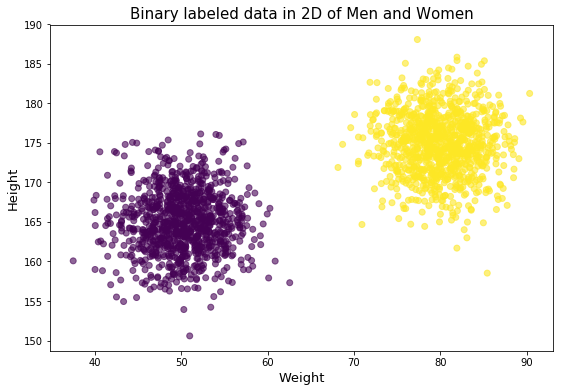

In [3]:
# We can visualize these data distributions
plt.figure(figsize=(9, 6))
plt.scatter(features_train[:, 0], features_train[:, 1],
            c = labels_train, alpha = .6);
plt.title("Binary labeled data in 2D of Men and Women", size=15);
plt.xlabel("Weight", size=13);
plt.ylabel("Height", size=13);

### Make predictions for test data from same underlying distribution

In [4]:
#Generate some test data from the same distributions:
sample_size = 100
y = data_generating_process(sample_size, 2) 
w_data,w_label = y.women_data()
m_data,m_label = y.men_data()

features_test, labels_test = y.stacking(w_data,w_label,m_data,m_label)

In [5]:
algo = knn(features_train, labels_train, features_test, labels_test, 3)
preds = algo.knn_prediction()
acc = algo.accuracy(preds)
acc

1.0

### Make predictions from different underlying distribution

In [6]:
#Use data that does not come from the same distribution as our training data:
#Generate some test data from the same distributions:
sample_size = 100
y = data_generating_process(sample_size, 2) 
w_data,w_label = y.alien_men_data()
m_data,m_label = y.alien_women_data()

features_test, labels_test = y.stacking(w_data,w_label,m_data,m_label)

In [7]:
#Find knn using 3 neighbors:
algo = knn(features_train, labels_train, features_test, labels_test, 3)
preds = algo.knn_prediction()
acc = algo.accuracy(preds)
acc

0.09

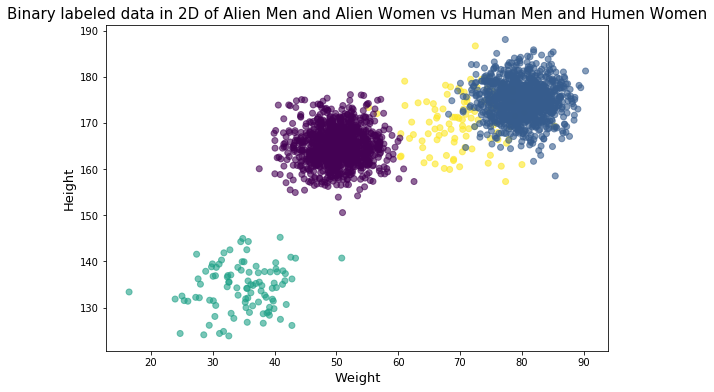

In [9]:
# We can visualize these data distributions
w_label = w_label +1
m_label = w_label +3

features_test, labels_test = y.stacking(w_data,w_label,m_data,m_label)
features_all, labels_all = y.stacking(features_test, labels_test,features_train, labels_train)

plt.figure(figsize=(9, 6))
plt.scatter(features_all[:, 0], features_all[:, 1],
            c = labels_all, alpha = .6);
plt.title("Binary labeled data in 2D of Alien Men and Alien Women vs Human Men and Humen Women", size=15);
plt.xlabel("Weight", size=13);
plt.ylabel("Height", size=13);